In [11]:
# Investigating Snowfall and its Reltion to Droughts
# Notebook to demonstrate the correlation between wintertime snowfall and summertime droughts in Colorado


@author = Andrew Fleming for ESCI 7/896.02  
@date = 2023-03-29  
@license = MIT -- https://opensource.org/licenses/MIT


SyntaxError: invalid syntax (3632963076.py, line 5)

In [ ]:
# In regions located aroiund the Rocky mountains snowfall plays a major role in the hydrologic cycle.
#These regions also have trouble in the summertime with water supply and often times they expereinec droughts.

# This study will forcus around investigating whether or not there is a correlation between snowfall quantity and 
#drought intesity/frequency.

# Many parts of the U.S. rely on snowmelt for water resoruces. Snowmelt from the Rocky mountains 
#often makes its way to the Colorado River or another major aqauduct, so understanding how much 
#and when snow melts off can predict when droughst are likely to occur.


In [12]:
#Import Libraies
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [13]:
#%%Load in Snowfall data from 1997-2022

#Data is given in precipitation and in SWE(snow water equivalent) both of which are converted to centimeters

In [14]:
#Specify folder name and variable names
subfolder1_name = 'Snow data'

#Create function
def readscan(filename):
    #read files
    data_snow = pd.read_csv(filename, header = 1, na_values = [-99.9], 
                   parse_dates=['Date'], index_col='Date')
    #Rename columns
    data_snow = data_snow.rename(columns={'WTEQ.I-1 (in) ': 'SWE_in','PREC.I-1 (in) ': 'Precip_in'})
       
    #Only have integrated data_snow so take difference for daily values
    data_snow['Precip_in']=data_snow['Precip_in'].diff()
    data_snow['SWE_in']=data_snow['SWE_in'].diff()
    
    #resample
    data_snow = data_snow.resample('D').mean(numeric_only=True)
   
    #Convert to cm 
    data_snow['Precip_cm'] = data_snow['Precip_in']*2.54
    data_snow['SWE_cm'] = data_snow['SWE_in']*2.54
   
    #replace negaive values with nan
    data_snow.loc[data_snow['Precip_cm']<0,'Precip_cm'] = np.nan
    data_snow.loc[data_snow['SWE_cm']<0,'SWE_cm'] = np.nan
    
    #Deleat unwanted columns
    data_snow = data_snow[['SWE_cm','Precip_cm']]
    return data_snow

filenames = os.listdir(subfolder1_name)
if 'data_snow' in globals():
    del data_snow
    
for filename in filenames:
    data_snow_small=readscan(subfolder1_name+ '\\' + filename)
    try:
        data_snow= pd.concat([data_snow,data_snow_small])
    except:
        data_snow= data_snow_small

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Snow data'

In [ ]:
#%%Load in Soil Moisture data from 1997-2022

In [7]:
#Specify folder name and variable names
subfolder2_name = 'Soil data'

#Create function
def readscan(filename):
    #read files
    data_sm = pd.read_csv(filename, header = 1, na_values = [-99.9], 
                   parse_dates=['Date'], index_col='Date')
    #Rename columns
    data_sm = data_sm.rename(columns={'SMS.I-1:-2 (pct)  (loam)': 'SM5',
                                'SMS.I-1:-4 (pct)  (loam)': 'SM10','SMS.I-1:-8 (pct)  (loam)': 'SM20',
                                'SMS.I-1:-20 (pct)  (loam)': 'SM50','SMS.I-1:-40 (pct)  (loam)': 'SM100'})
    
    #Replace negatives with nan
    data_sm.loc[data_sm['SM50']<0,'SM50'] = np.nan
    data_sm.loc[data_sm['SM100']<0,'SM100'] = np.nan
    
    #resample
    data_sm = data_sm.resample('D').mean(numeric_only=True)

    data_sm = data_sm[['SM5','SM10','SM20','SM50','SM100']]
    return data_sm

filenames = os.listdir(subfolder2_name)

for filename in filenames:
    data_sm_small=readscan(subfolder2_name+ '\\' + filename)
    try:
        data_sm= pd.concat([data_sm,data_sm_small])
    except:
        data_sm= data_sm_small

#Fill in Missing data
data_sm['SM5'] = data_sm['SM5'].fillna(data_sm['SM10'])
data_sm['SM10'] = data_sm['SM10'].fillna((data_sm['SM5'] +data_sm['SM20'])/2)
data_sm['SM20'] = data_sm['SM20'].fillna((data_sm['SM10'] +data_sm['SM50'])/2)
data_sm['SM50'] = data_sm['SM50'].fillna((data_sm['SM20'] +data_sm['SM100'])/2)
data_sm['SM100'] = data_sm['SM100'].fillna(data_sm['SM50'])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Soil data'

In [8]:
#%% Creating a time series plot for the snow data over the study period


NameError: name 'data_snow' is not defined

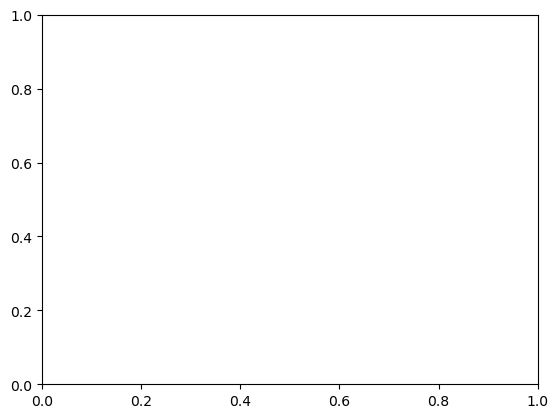

In [9]:
# Create plot 
fig1, ax = plt.subplots()

# Plot another data series
ax.plot(data_snow['Precip_cm'],  # x = 1st series, y = 2nd series)
        'b--',                            # Line Format
        label = 'Precipitation')         # series label for legend

# Plot one data series 
ax.plot(data_snow['SWE_cm'],  # x = 1st series, y = 2nd series)
        'k-',                           # Line Format
        label = 'SWE')       # series label for legend


# Add plot components 
ax.set_xlabel('Year')         # x-axis label 
ax.set_ylabel('cm')          # y-axis label
ax.set_title('Precipitation and SWE') # figure title
ax.legend()                                   # legend

# Optional command to make x-tick labels diagonal to avoid overlap
fig1.autofmt_xdate()  

In [10]:
#%% Create a time series plot for soil moisture data over the desired study period

In [ ]:
#%%Create Time Series Plot for SM

# Create plot 
fig2, ax2 = plt.subplots()

# Plot another data series
ax2.plot(data_sm['SM5'],  # x = 1st series, y = 2nd series)
        'b',                            # Line Format
        label = '5cm')         # series label for legend

ax2.plot(data_sm['SM10'],  # x = 1st series, y = 2nd series)
        'r',                            # Line Format
        label = '10cm')         # series label for legend

ax2.plot(data_sm['SM20'],  # x = 1st series, y = 2nd series)
        'k',                            # Line Format
        label = '20cm')         # series label for legend

ax2.plot(data_sm['SM50'],  # x = 1st series, y = 2nd series)
        'g',                            # Line Format
        label = '50cm')         # series label for legend

ax2.plot(data_sm['SM100'],  # x = 1st series, y = 2nd series)
        'y',                            # Line Format
        label = '100cm')         # series label for legend


# Add plot components 
ax2.set_xlabel('Year')         # x-axis label 
ax2.set_ylabel('centimeters')          # y-axis label
ax2.set_title('Soil Moisture') # figure title
ax2.legend()                                   # legend

# Optional command to make x-tick labels diagonal to avoid overlap
fig2.autofmt_xdate() 


In [ ]:
#Condense Snow data to winter months only (DJFM)
#Condense soil moisture data to summer months only (JJAS)

In [ ]:
#Create plots comparing variables

In [ ]:
#calculate correlation factors